In [26]:
import gensim.downloader as api
import numpy as np

In [27]:
glove_vectors = api.load("glove-wiki-gigaword-100")

/Users/stevecen/anaconda/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyboardInterrupt: 

In [ ]:
glove_vectors.get_vector("marijuana")

In [18]:
glove_vectors.n_similarity(["marijuana"], ["lit"]), glove_vectors.n_similarity(["cocaine"], ["party"])

(0.079445906, 0.079106696)

In [20]:
glove_vectors.most_similar('marijuana'), glove_vectors.most_similar('cocaine')

([('cannabis', 0.881885290145874),
  ('cocaine', 0.7596597671508789),
  ('heroin', 0.7342092990875244),
  ('hashish', 0.7207790613174438),
  ('drugs', 0.7079291343688965),
  ('alcohol', 0.6976802349090576),
  ('methamphetamine', 0.6866514086723328),
  ('drug', 0.6669683456420898),
  ('cigarettes', 0.6572348475456238),
  ('ecstasy', 0.6319848299026489)],
 [('heroin', 0.8946170210838318),
  ('marijuana', 0.7596597671508789),
  ('methamphetamine', 0.7567210793495178),
  ('hashish', 0.755803644657135),
  ('drugs', 0.7376880645751953),
  ('narcotics', 0.7373349666595459),
  ('drug', 0.7308536171913147),
  ('trafficking', 0.722845733165741),
  ('ecstasy', 0.7054710984230042),
  ('smuggling', 0.6787711977958679)])

In [4]:

model_glove_twitter.wv.most_similar("marijuana",topn=10)

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('cannabis', 0.9162882566452026),
 ('tobacco', 0.9054561257362366),
 ('drug', 0.8792878985404968),
 ('plant', 0.8731170296669006),
 ('obesity', 0.869333028793335),
 ('drugs', 0.8672326803207397),
 ('fracking', 0.86279296875),
 ('illegal', 0.8586475253105164),
 ('plants', 0.8560640811920166),
 ('prostitution', 0.8524695634841919)]

In [ ]:
marijuana_vector = model_glove_twitter.wv.get_vector("marijuana")
cmp_words = ["cool", "lit", "sell", "smoke", "grow", "legalize", "love"]


# Initial Hypothesis 1

In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
model_glove_twitter = api.load("glove-twitter-25")

/Users/stevecen/anaconda/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


How do drugs of different levels of abuse / popularity / DSM criteria correlate with embedding similarity to a curated list of words? (ie lit, cool, selling etc.)
- Hypothesis: The more/less similar some drug is this curated set of words, the more/less popular it is


In [145]:
def get_similarity_to_curated(word):
#     curated_words = ["cool", "lit", "sell", "smoke", "grow", "legalize"]
#     curated_words = ["cool", "lit", "sell", "smoke", "legalize"]
    curated_words = ["lit"]
    curated_vectors = [model_glove_twitter.wv.get_vector(curated_word) for curated_word in curated_words]
    word_vector = model_glove_twitter.wv.get_vector(word)
    
    return np.average(model_glove_twitter.wv.cosine_similarities(word_vector, curated_vectors))

drug_list = [
# "Marijuana",
"Cocaine",
"Crack",
"Heroin",
"Hallucinogens",
"LSD",
"PCP",
"Ecstasy",
"Methamphetamine",
"Tranquilizers",
"Stimulants",
"Sedatives",
"Opioids"]

drug_list = [drug.lower() for drug in drug_list]

popularity_list = [
# 37570,
5071,
882,
948,
4903,
1896,
103,
2485,
1660,
6060,
5647,
1531,
11824]

In [146]:
drug_to_pop = {drug: pop for drug, pop in zip(drug_list, popularity_list)}
drug_to_similarity = {drug: get_similarity_to_curated(drug) 
                      for drug
                      in drug_list}

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


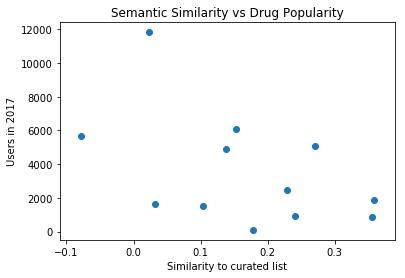

In [150]:
# plt.plot(np.array(drug_to_pop.values()), np.array(drug_to_similarity.values()))      
# plt.plot([1,2,3], [5,8,9])
plt.scatter(list(drug_to_similarity.values()), list(drug_to_pop.values()))      
plt.xlabel("Similarity to curated list")
plt.ylabel("Users in 2017")
plt.title("Semantic Similarity vs Drug Popularity")
plt.show()

# Misc

In [ ]:
model_glove_twitter.wv.get

In [6]:
model_glove_twitter.wv.n_similarity(["marijuana"], ["lit"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.31275687

In [26]:
model_glove_twitter.wv.n_similarity(["weed"], ["party"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.64277226

In [10]:
model_glove_twitter.wv.n_similarity(["alc"], ["lit"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.24257484

In [11]:
model_glove_twitter.wv.n_similarity(["alcohol"], ["lit"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.37412006

In [12]:
model_glove_twitter.wv.n_similarity(["weed"], ["lit"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.5625081

In [13]:
model_glove_twitter.wv.n_similarity(["crack"], ["lit"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.3553815

In [31]:
model_glove_twitter.wv.n_similarity(["marijuana"], ["lit"])

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


0.31275687

In [29]:
cmp_words = ["cool", "lit", "sell", "smoke", "grow", "legalize", "love"]

In [32]:
{word: model_glove_twitter.wv.n_similarity(["marijuana"], [word]) for word in cmp_words}

/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


{'cool': 0.37454644,
 'grow': 0.6191894,
 'lit': 0.31275687,
 'sell': 0.64914745,
 'smoke': 0.6500305}

In [33]:
drugs = ["marijuana", "cocaine", "alcohol"]

In [34]:
for drug in drugs:
    print(drug)
    print({word: model_glove_twitter.wv.n_similarity([drug], [word]) 
           for word in cmp_words})

marijuana
{'cool': 0.37454644, 'lit': 0.31275687, 'sell': 0.64914745, 'smoke': 0.6500305, 'grow': 0.6191894}
cocaine
{'cool': 0.4096233, 'lit': 0.27100548, 'sell': 0.6403355, 'smoke': 0.79252136, 'grow': 0.65247047}
alcohol
{'cool': 0.53852844, 'lit': 0.37412006, 'sell': 0.56893986, 'smoke': 0.68107414, 'grow': 0.64239675}


/Users/stevecen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [35]:
import time

In [41]:
time.time() - 1574277079

-6829.365911960602

In [ ]:
time.gmtime(0)